<a href="https://colab.research.google.com/github/yogee2406/Breast-cancer-ML_Yogeeta.ipynb/blob/main/Capstone_Project_1_(CDF)_INSAID_Telecom_Team_1001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project 1 (CDF) Insaid Telecom Team 1001

# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Summarization**](#Section9)</br>

 <a name = Section1></a>
# **1. Introduction**

It's always wonderful to see services customized to your needs.Businesses try to understand your behavior and adjust their offerings, so as to ensure you feel attached to their services.
- **InsaidTelecom**, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive.
- Currently, InsaidTelecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

![image.png](attachment:image.png)

In this assignment, you are going to **study the demographics** of a **user (gender and age)** based on their app download and usage behaviors.
The Data is collected from mobile apps that use InsaidTelecom services. Full recognition and consent from individual user of those apps have been obtained,
and appropriate anonymization have been performed to protect privacy. Due to confidentiality, we won't provide details on how the gender and age data was obtained.


 <a name = Section2></a>
# **2. Problem Statement**

- Insaidians are expected to **build a dashboard** to understand user's **demographic characteristics** based on their:
  - mobile usage
  - geolocation, and
  - mobile device properties.
- Doing so will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

- To help the customer the consultants are expected to have depth of clarity in the underlying data.
**How much effort has been put into cleansing and purifying the data will decide how closely have you looked at the data.
How detailed is the observation stated in the submission report and finally how well a group presents their consulting journey.**

- Please remember this is an analytics consulting hence, your efforts in terms of finding user behavior is going to directly impact the company's offerings.
- Do help the company understand what is the right way forward and suggest actionable insights from marketing and product terms.

<a id = Section3></a>
# **3. Installing & Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
%matplotlib inline
import seaborn as sns                                               # Importing seaborn library for interactive visualization
from matplotlib.legend_handler import HandlerBase

#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

<a name = Section4></a>
# **4. Data Acquisition & Description**

**events_data**
- when a user uses mobile on INSAID Telecom network, the event gets logged in this data.
- Each event has an event id, location (lat/long), and the event corresponds to frequency of mobile usage.
- timestamp: when the user is using the mobile.

**gender_age_train**
- Devices and their respective user gender, age and age_group

**phone_brand_device_model**
- device ids, brand, and models phone_brand: note that few brands are in Chinese

## Events Data details

In [ ]:
events_data = pd.read_csv('events_data.csv')
events_data

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3252945,2687452,-1.937028e+18,2016-05-07 23:33:14,73.891597,18.544124,Pune,Maharashtra
3252946,1051580,3.345851e+18,2016-05-03 05:13:30,72.837258,19.018432,Mumbai,Maharashtra
3252947,1316227,-6.406040e+18,2016-05-01 16:03:28,77.235578,28.764065,Delhi,Delhi
3252948,381262,-2.920741e+18,2016-05-05 17:22:36,83.326044,17.765488,Visakhapatnam,AndhraPradesh


In [ ]:
events_data['state'].nunique()

32

In [ ]:
events_data.shape

(3252950, 7)

In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  float64
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [ ]:
events_data.isna().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [ ]:
events_data['event_id'].nunique()

3252950

In [ ]:
events_data['device_id'].nunique()

60865

In [ ]:
events_data['city'].nunique()

933

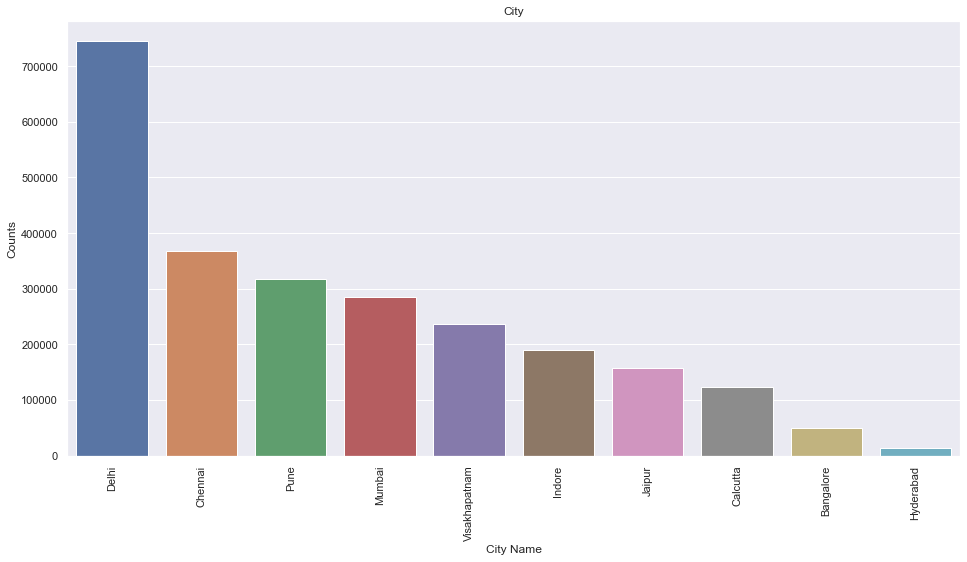

In [ ]:
# Distribution of City in the Event Table
fig, ax = plt.subplots(figsize = (16,8))

sns.barplot(x =events_data['city'].value_counts().keys()[:10], y=events_data['city'].value_counts()[:10])
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('City')
plt.show()

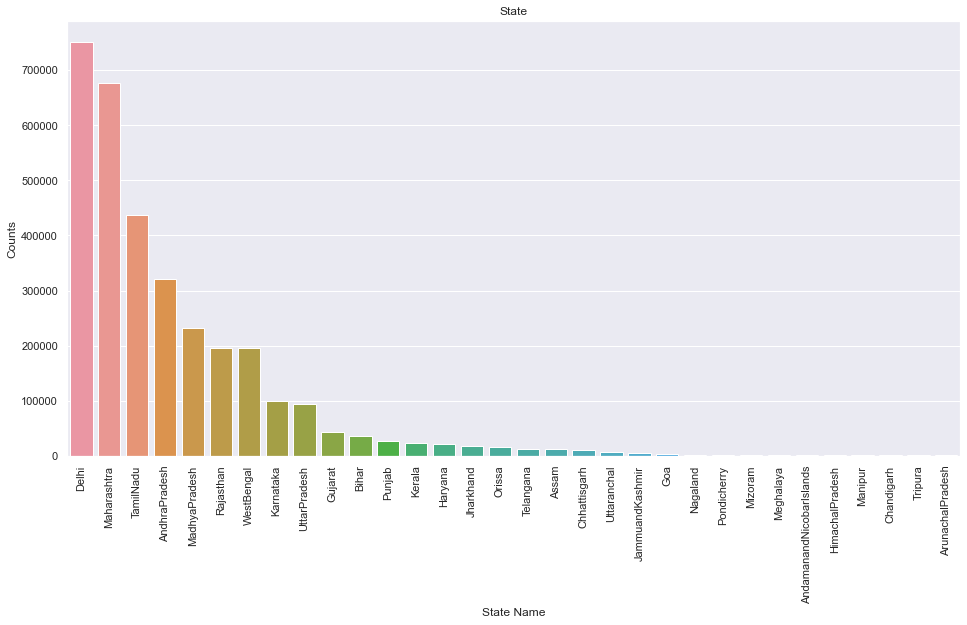

In [ ]:
# Distribution of State in the Event table
fig, ax = plt.subplots(figsize = (16,8))

sns.barplot(x =raw_data['state'].value_counts().keys(), y=raw_data['state'].value_counts())
plt.xlabel('State Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('State')
plt.show()

## Observations:
1. Events data set shape is **3252950** Observations, and **7** Feature Columns for analysis.
2. Device_id unique, anonymized string of numbers and letters that identifies every individual smartphone or tablet in the world. Missing Values in device_id is 453
3. Timestamp datatype is Object, needs to be converted in timestamp for better analysis.
4. Longitude and Latitude can provide location of the device.
5. Longitude and Latitude is observed with 423 Missing values
6. State has 377 Missing values
7. Feature event_id shows **3252950** unique events
8. We can observe that in **3252950** events there are **60865** Unique device_id.


# Gender_Age_Train Data details

In [ ]:
gender_age_train = pd.read_csv("gender_age_train.csv")

In [ ]:
gender_age_train

In [ ]:
gender_age_train.shape

(74645, 4)

In [ ]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [ ]:
gender_age_train.describe()

,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


In [ ]:
gender_age_train.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [ ]:
gender_age_train["gender"].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

In [ ]:
gender_age_train['device_id'].nunique()

74645

In [ ]:
100*(gender_age_train['gender'].value_counts()/ gender_age_train.shape[0])

M    64.175765
F    35.824235
Name: gender, dtype: float64

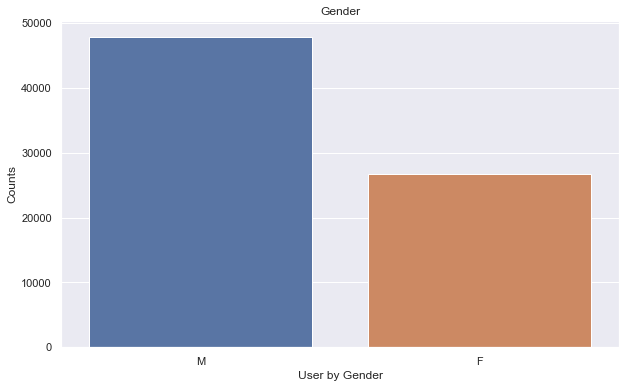

In [ ]:
# Distribution of Gender in gender_age_train table
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x =gender_age_train['gender'].value_counts().keys(), y=gender_age_train['gender'].value_counts())
plt.xlabel('User by Gender')
plt.ylabel('Counts')
plt.title('Gender')
plt.show()

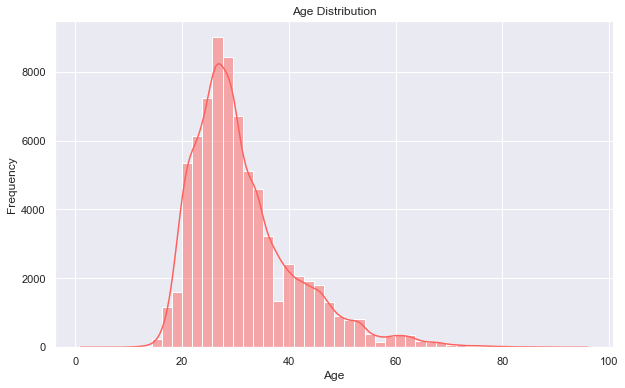

In [ ]:
# Distribution of Age in gender_age_train table
fig, ax = plt.subplots(figsize = (10,6))

sns.histplot(gender_age_train['age'], color = '#FD625E', bins = 50, kde = True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

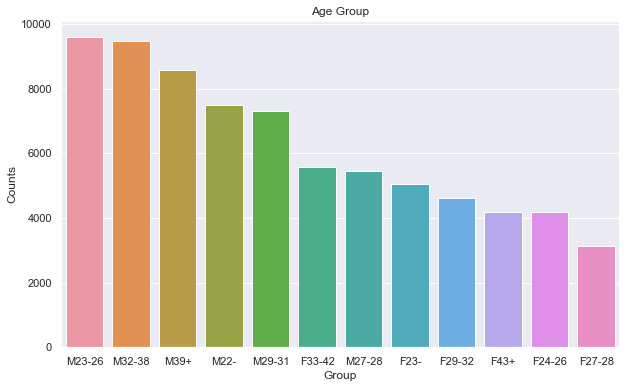

In [ ]:
#Group
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x =gender_age_train['group'].value_counts().keys(), y=gender_age_train['group'].value_counts())
plt.xlabel('Group')
plt.ylabel('Counts')
plt.title('Age Group')
plt.show()

## Observations: 
1. Shape of the gender_age_train dataset is **(74645,4)**.
2. No missing value is observed.
3. **Age** : 
    - It is observed that **MINIMUM Age is 1 and Max is 96**.
    - Avearge Users are of age 31 Years.
    - Median Age of user is 29 Years.
4. Some device_id is negative, we have remove the negative sign form the device id.
5. In the given dataset we can observe that Male users are more than Female Users.
6. Service users are 64% Male and 35% are Female.
7. It is observed that users from 1- 96 Years.
8. Users between 20-40 years are high, they are very active user of the service.
9. We can also see that there are users between 1-15 and 80-96 years. 
10. Users between age group 23-26 & 32-38 are high and are Male Users.
11. Female Users between age group 33-42 are high.

<AxesSubplot:ylabel='Frequency'>

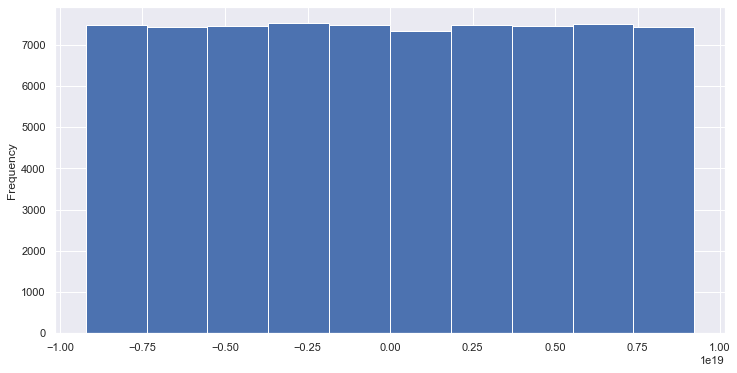

In [ ]:
gender_age_train['device_id'].plot.hist(figsize = (12, 6))

<AxesSubplot:ylabel='Frequency'>

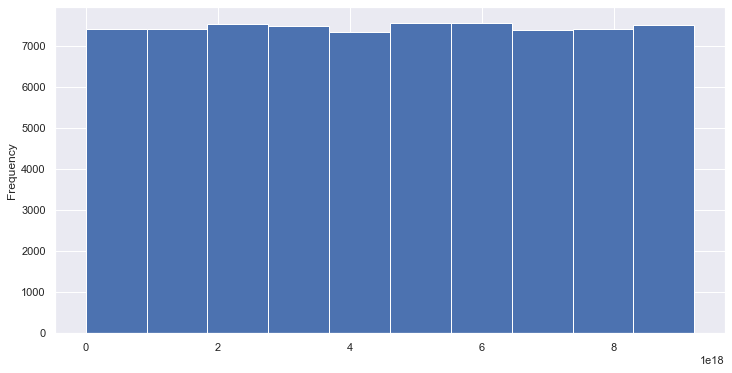

In [ ]:
abs(gender_age_train['device_id']).plot.hist(figsize = (12, 6))

# Phone_Brand_Device_Model Data details

In [ ]:
phone_brand_device_model = pd.read_csv("phone_brand_device_model.csv")

In [ ]:
phone_brand_device_model

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2
...,...,...,...
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2


In [ ]:
phone_brand_device_model.shape

(87726, 3)

In [ ]:
phone_brand_device_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   device_id     87726 non-null  int64 
 1   phone_brand   87726 non-null  object
 2   device_model  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [ ]:
phone_brand_device_model.describe()

,device_id
count,8.772600e+04
mean,-5.212557e+15
std,5.330157e+18
min,-9.223322e+18
25%,-4.623331e+18
50%,-3.109802e+16
75%,4.635194e+18
max,9.222849e+18


In [ ]:
phone_brand_device_model['device_id'].nunique()

87726

In [ ]:
phone_brand_device_model.phone_brand.nunique()

116

In [ ]:
phone_brand_device_model.device_model.nunique()

1467

<AxesSubplot:ylabel='Frequency'>

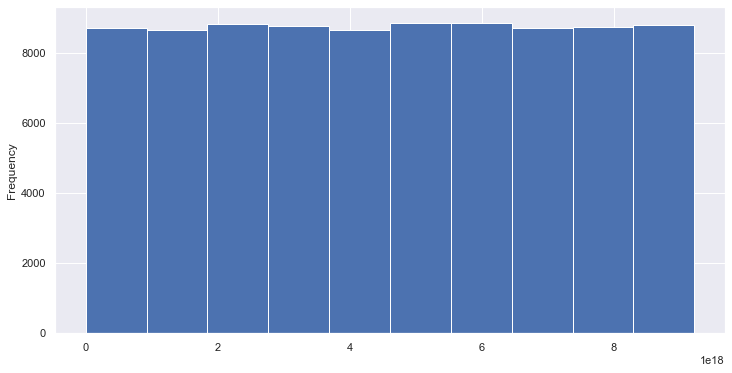

In [ ]:
abs(phone_brand_device_model['device_id']).plot.hist(figsize = (12, 6))

## Observations: 
1. There are 87726 records in the dataset.

2. missing valuse in the dataset.

3. 1467 total device model and 116 phone brand available in the dataset.

<a name = Section5></a>
# **5. Data Pre-Profiling**

In [ ]:
#profile_Event = ProfileReport(events_data)
#profile_Event.to_file(output_file='Pre Profiling Report_Event.html')
#profile_Event

In [ ]:
#profile_Age_Gender = ProfileReport(gender_age_train)
#profile_Age_Gender.to_file(output_file='Pre Profiling Report_Age_Gender.html')
#profile_Age_Gender

In [ ]:
#profile_Phone_Brand = ProfileReport(phone_brand_device_model)
#profile_Phone_Brand.to_file(output_file='Pre Profiling profile_Phone_Brand.html')
#profile_Phone_Brand

<a name = Section6></a>
# **6. Data Pre-Processing**

1. Device_id in all three dataset change from negative to positive using abs().
2. Timestamp datatype convert to valid timestamp using pandas to_datetime.
3. Find the missing Null values in Device_id, latitude, longitude and State and try to fill these data.
4. Check for outlier in age and remove it.
5. Phone_brand and Device_model names change from Chinese to English.

### Device_id in all three dataset change from negative to positive using abs().

In [ ]:
#Converting the negative device id to positive value

events_data["device_id"] = abs(events_data["device_id"])
gender_age_train['device_id'] = abs(gender_age_train['device_id'])
phone_brand_device_model['device_id'] = abs(phone_brand_device_model['device_id'])

### Timestamp datatype convert to valid timestamp using pandas to_datetime.

In [ ]:
#Converting the timestamp datatype to Datetime format.

events_data["timestamp"] = pd.to_datetime(events_data["timestamp"])

In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   event_id   int64         
 1   device_id  float64       
 2   timestamp  datetime64[ns]
 3   longitude  float64       
 4   latitude   float64       
 5   city       object        
 6   state      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 173.7+ MB


In [ ]:
#Missing values in Event Data table
raw_data.isna().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

### Filling Missing Values for State

In [ ]:
# Missing State

state_missing = events_data[events_data['state'].isna()]
state_missing

,event_id,device_id,timestamp,longitude,latitude,city,state
2931,706554,5.829328e+18,2016-05-05 16:58:46,73.851671,18.593313,Pune,NaN
16243,1918653,3.137054e+18,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,NaN
26956,1068940,1.752057e+18,2016-05-04 16:09:17,75.930969,22.818845,Indore,NaN
30889,2164200,3.945827e+17,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,NaN
32685,460124,5.536513e+18,2016-05-01 21:30:10,80.359796,13.128174,Chennai,NaN
...,...,...,...,...,...,...,...
3210326,1070365,5.858653e+18,2016-05-07 17:03:06,88.619418,25.484459,Gangarampur,NaN
3226848,145171,4.620271e+18,2016-05-07 20:38:45,87.812710,22.957980,Arambagh,NaN
3235317,210361,8.340098e+18,2016-05-05 20:53:20,77.305988,28.688980,Delhi,NaN
3236931,2738361,4.113023e+18,2016-05-02 18:15:04,75.906533,22.732515,Indore,NaN


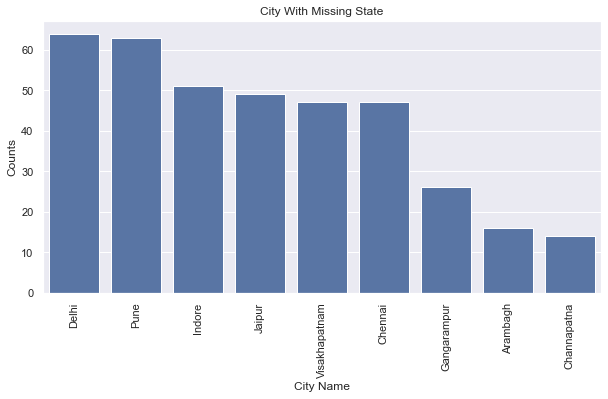

In [ ]:
# Plot for city with missing state
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x = state_missing['city'].value_counts().keys(), y = state_missing['city'].value_counts(), color = 'b')
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('City With Missing State')
plt.show()

In [ ]:
state_missing.city.nunique()

9

In [ ]:
state_missing.city.unique()

array(['Pune', 'Visakhapatnam', 'Indore', 'Chennai', 'Delhi',
       'Channapatna', 'Jaipur', 'Gangarampur', 'Arambagh'], dtype=object)

In [ ]:
# Filling the missing values for states
events_data['state'] = np.where(events_data['city'] == 'Delhi', 'Delhi', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Pune', 'Maharashtra', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Indore', 'MadhyaPradesh', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Jaipur', 'Rajasthan', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Visakhapatnam', 'AndhraPradesh', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Chennai', 'TamilNadu', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Gangarampur', 'WestBengal', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Arambagh', 'WestBengal', events_data.state)
events_data['state'] = np.where(events_data['city'] == 'Channapatna', 'Karnataka', events_data.state)

### Filling Missing Values for Device Id

In [ ]:
# Filling missing device_id
device_id_null = events_data[events_data['device_id'].isna()]
device_id_null

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
26367,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan
42088,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan
43061,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh
44823,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab
...,...,...,...,...,...,...,...
3212337,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh
3215120,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh
3230115,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab
3235494,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh


In [ ]:
device_id_null['city'].unique()

array(['Indore', 'Jaipur', 'Hoshiarpur', 'Pune', 'Visakhapatnam', 'Delhi',
       'Chennai', 'Bardoli', 'Jetpur'], dtype=object)

In [ ]:
device_id_null[device_id_null['city'] == 'Indore']

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
43061,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh
189660,558444,NaN,2016-05-02 18:58:23,75.882956,22.814519,Indore,MadhyaPradesh
199890,1023857,NaN,2016-05-06 21:40:35,75.958050,22.817526,Indore,MadhyaPradesh
236930,2363820,NaN,2016-05-02 12:20:15,75.958050,22.817526,Indore,MadhyaPradesh
264336,850678,NaN,2016-05-07 15:40:10,75.882956,22.814519,Indore,MadhyaPradesh
306432,2370402,NaN,2016-05-01 16:20:07,75.923332,22.777781,Indore,MadhyaPradesh
346737,84091,NaN,2016-05-02 13:28:09,75.882956,22.814519,Indore,MadhyaPradesh
383158,62725,NaN,2016-05-05 23:29:23,75.923332,22.777781,Indore,MadhyaPradesh
413009,520053,NaN,2016-05-01 16:23:00,75.923332,22.777781,Indore,MadhyaPradesh


In [ ]:
# Unique Longitudes and Latitude
device_id_null['longitude'].unique(), device_id_null['latitude'].unique()

(array([75.882956, 75.888487, 75.846007, 75.923332, 75.992551, 73.862756,
        73.860165, 83.357991, 77.292481, 73.926499, 80.343613, 80.309272,
        77.274814, 83.371738, 75.95805 , 83.342711, 75.836167, 80.335435,
        73.169345, 70.686387, 77.303153]),
 array([22.814519, 26.948689, 26.960796, 22.777781, 31.561747, 18.628057,
        18.566925, 17.805195, 28.719966, 18.614812, 13.153332, 13.149176,
        28.721053, 17.752819, 22.817526, 17.822906, 26.95399 , 13.189053,
        21.194283, 21.790693, 28.728888]))

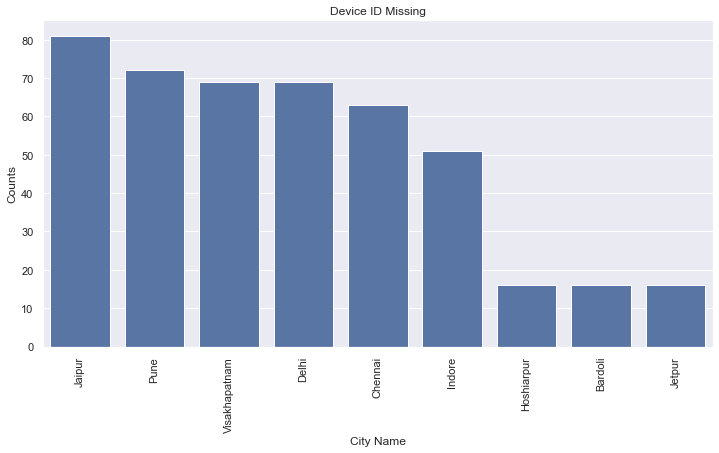

In [ ]:
# Null Device id
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = device_id_null['city'].value_counts().keys(), y = device_id_null['city'].value_counts(), color = 'b')
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('Device ID Missing')
plt.show()

In [ ]:
events_data.isna().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

In [ ]:
#unique device id 
unique_device_id = events_data.drop_duplicates(['device_id'])
unique_device_id

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand
...,...,...,...,...,...,...,...
3251857,2437377,4.114379e+18,2016-05-06 21:19:09,80.290241,13.150984,Chennai,TamilNadu
3252013,69286,3.194728e+17,2016-05-03 06:39:47,72.886717,19.049232,Mumbai,Maharashtra
3252525,602171,3.294038e+18,2016-05-03 11:16:30,77.633307,13.065801,Bangalore,Karnataka
3252794,2170713,5.838484e+18,2016-05-07 22:18:57,76.422242,26.947862,Daosa,Rajasthan


In [ ]:
unique_device_id[unique_device_id['city'] == 'Jaipur']

,event_id,device_id,timestamp,longitude,latitude,city,state
54,1888847,2.801062e+17,2016-05-02 15:52:42,75.863671,26.931170,Jaipur,Rajasthan
57,2342814,5.163961e+18,2016-05-04 16:26:56,75.813028,26.955495,Jaipur,Rajasthan
101,2787217,8.105133e+18,2016-05-07 19:29:03,75.867452,26.985617,Jaipur,Rajasthan
107,1856551,6.071853e+18,2016-05-05 15:27:28,75.841276,26.978374,Jaipur,Rajasthan
113,1752747,5.423275e+18,2016-05-04 16:58:47,75.861558,26.986656,Jaipur,Rajasthan
...,...,...,...,...,...,...,...
2217610,2481417,5.751494e+18,2016-05-04 15:09:58,75.858036,26.995757,Jaipur,Rajasthan
2246531,18450,1.169762e+18,2016-05-07 16:41:11,75.898000,26.975902,Jaipur,Rajasthan
2383566,2244963,5.477560e+18,2016-05-05 17:58:16,75.866324,26.940927,Jaipur,Rajasthan
2536283,2458115,7.749424e+18,2016-05-06 16:58:33,75.865496,26.933678,Jaipur,Rajasthan


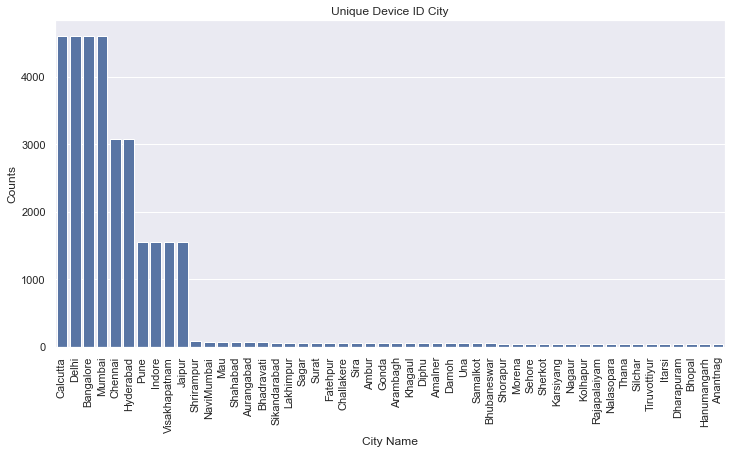

In [ ]:
#unique device id
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = unique_device_id['city'].value_counts().keys()[:50], y = unique_device_id['city'].value_counts()[:50], color = 'b')
plt.xlabel('City Name')
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.title('Unique Device ID City')
plt.show()

In [ ]:
# pune_missing_device_id 
pune = device_id_null[device_id_null['city'] == 'Pune']
pune['longitude'].unique()

array([73.862756, 73.860165, 73.926499])

In [ ]:
pune

,event_id,device_id,timestamp,longitude,latitude,city,state
45052,1129522,NaN,2016-05-02 22:05:43,73.862756,18.628057,Pune,Maharashtra
59590,690029,NaN,2016-05-05 20:30:03,73.860165,18.566925,Pune,Maharashtra
106494,1722320,NaN,2016-05-04 16:57:25,73.926499,18.614812,Pune,Maharashtra
119854,1753386,NaN,2016-05-07 17:48:34,73.926499,18.614812,Pune,Maharashtra
135788,2860746,NaN,2016-05-03 18:32:17,73.862756,18.628057,Pune,Maharashtra
...,...,...,...,...,...,...,...
3016652,2802507,NaN,2016-05-03 11:43:25,73.860165,18.566925,Pune,Maharashtra
3026865,1660304,NaN,2016-05-06 22:15:44,73.862756,18.628057,Pune,Maharashtra
3067777,317114,NaN,2016-05-03 19:04:46,73.862756,18.628057,Pune,Maharashtra
3106136,455292,NaN,2016-05-01 16:15:02,73.860165,18.566925,Pune,Maharashtra


In [ ]:
visakhapatnam = device_id_null[device_id_null['city'] == 'Visakhapatnam']
visakhapatnam['longitude'].unique(), visakhapatnam['latitude'].unique()

(array([83.357991, 83.371738, 83.342711]),
 array([17.805195, 17.752819, 17.822906]))

In [ ]:
events_data['device_id'] = np.where(events_data['longitude'] == 75.888487, 9.177251e+17, events_data.device_id).astype(float)
events_data['device_id'] = np.where(events_data['longitude'] == 75.846007, 8.460337e+18, events_data.device_id).astype(float)
events_data['device_id'] = np.where(events_data['longitude'] == 75.836167, 3.562356e+18, events_data.device_id).astype(float)
events_data['device_id'] = np.where(events_data['longitude'] == 73.862756, 9.027086e+18, events_data.device_id).astype(float)

In [ ]:
events_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   event_id   int64         
 1   device_id  float64       
 2   timestamp  datetime64[ns]
 3   longitude  float64       
 4   latitude   float64       
 5   city       object        
 6   state      object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 173.7+ MB


In [ ]:
events_data['device_id'].isna().sum()

348

In [ ]:
events_data['device_id'].nunique()

60865

### Using Folium to detect Anomaly

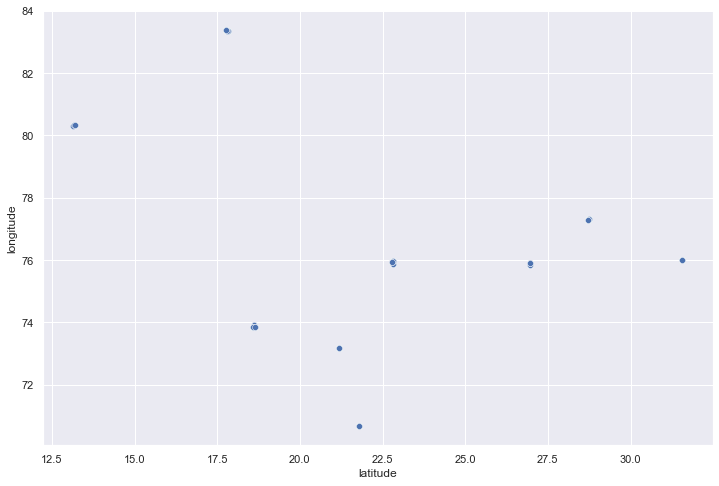

In [ ]:
%matplotlib inline
# NULL Device Id Plotting
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(x = device_id_null['latitude'], y = device_id_null['longitude'])
plt.show()

In [ ]:
#Null Device_id Locations 
null_device_locations = device_id_null[['city','latitude', 'longitude']].values.tolist()
null_device_locations

[['Indore', 22.814519, 75.88295600000002],
 ['Jaipur', 26.948689, 75.888487],
 ['Jaipur', 26.960796, 75.846007],
 ['Indore', 22.777781, 75.92333199999999],
 ['Hoshiarpur', 31.561747, 75.99255099999998],
 ['Pune', 18.628057, 73.862756],
 ['Pune', 18.566925, 73.86016500000002],
 ['Visakhapatnam', 17.805195, 83.357991],
 ['Delhi', 28.719966000000003, 77.29248100000002],
 ['Pune', 18.614812, 73.92649899999998],
 ['Jaipur', 26.960796, 75.846007],
 ['Pune', 18.614812, 73.92649899999998],
 ['Pune', 18.628057, 73.862756],
 ['Chennai', 13.153332, 80.34361299999998],
 ['Jaipur', 26.948689, 75.888487],
 ['Pune', 18.628057, 73.862756],
 ['Visakhapatnam', 17.805195, 83.357991],
 ['Pune', 18.614812, 73.92649899999998],
 ['Chennai', 13.149176, 80.30927199999998],
 ['Delhi', 28.721053, 77.27481399999998],
 ['Indore', 22.814519, 75.88295600000002],
 ['Visakhapatnam', 17.752819, 83.371738],
 ['Indore', 22.817526, 75.95805],
 ['Visakhapatnam', 17.822906, 83.342711],
 ['Jaipur', 26.95399, 75.836167],
 ['I

In [ ]:
import folium
device_map = folium.Map(location = [22.660325, 88.388361])
fg = folium.FeatureGroup(name ='null_id_locations')

for i in null_device_locations:
    fg.add_child(folium.Marker(location = [i[1], i[2]], popup=i[0],
                              icon = folium.Icon(color = 'red')))

device_map.add_child(fg)

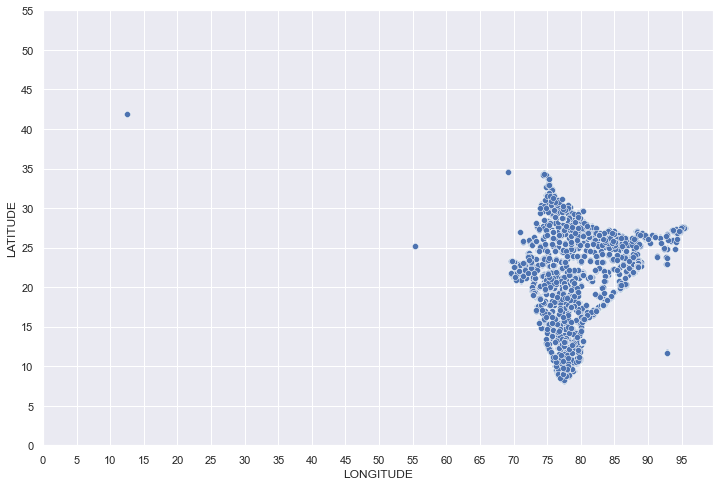

In [ ]:
#Device locations of the events data
fig, ax = plt.subplots(figsize = (12, 8))
sns.scatterplot(y = events_data['latitude'], x= events_data['longitude'])
plt.ylabel('LATITUDE')
plt.xlabel('LONGITUDE')
plt.xticks(ticks = np.arange(0, 100,5))
plt.yticks(ticks = np.arange(0,60,5))

plt.show()

In [ ]:
#Creating a separate data for Anomaly Locations
data_anomaly = events_data[events_data['longitude'] < 69.5]
data_anomaly['longitude'].unique(),data_anomaly['latitude'].unique()

(array([69.2075, 12.5674, 12.567 , 55.2708]),
 array([34.5553, 41.8719, 25.2048]))

In [ ]:
anomaly_locations = data_anomaly[['city','latitude', 'longitude']].values.tolist()

In [ ]:
#Anomaly Locations
anomaly_locations

[['Chennai', 34.5553, 69.2075],
 ['Jaipur', 41.8719, 12.5674],
 ['Chennai', 41.8719, 12.5674],
 ['Delhi', 41.8719, 12.5674],
 ['Pune', 41.8719, 12.567],
 ['Chennai', 41.8719, 12.5674],
 ['Chennai', 41.8719, 12.5674],
 ['Masaurhi', 34.5553, 69.2075],
 ['Pune', 34.5553, 69.2075],
 ['Masaurhi', 34.5553, 69.2075],
 ['Chennai', 25.2048, 55.2708],
 ['Indore', 34.5553, 69.2075],
 ['Indore', 25.2048, 55.2708],
 ['Visakhapatnam', 41.8719, 12.5674],
 ['Ilkal', 25.2048, 55.2708],
 ['Pune', 41.8719, 12.567],
 ['Pune', 34.5553, 69.2075],
 ['Pune', 34.5553, 69.2075],
 ['Indore', 41.8719, 12.5674],
 ['Chennai', 34.5553, 69.2075],
 ['Delhi', 41.8719, 12.5674],
 ['Indore', 34.5553, 69.2075],
 ['Delhi', 34.5553, 69.2075],
 ['Pune', 25.2048, 55.2708],
 ['Purnia', 41.8719, 12.5674],
 ['Indore', 41.8719, 12.5674],
 ['Purnia', 41.8719, 12.5674],
 ['Indore', 25.2048, 55.2708],
 ['Pune', 41.8719, 12.567],
 ['Jaipur', 41.8719, 12.5674],
 ['Visakhapatnam', 41.8719, 12.5674],
 ['Jaipur', 34.5553, 69.2075],
 ['De

In [ ]:
#Plotting Anomaly Device Locations on Map
import folium
device_map = folium.Map(location = [22.660325, 88.388361])
fg = folium.FeatureGroup(name ='anomaly_id_locations')

for i in anomaly_locations:
    fg.add_child(folium.Marker(location = [i[1], i[2]], popup=i[0],
                              icon = folium.Icon(color = 'blue')))

device_map.add_child(fg)

In [ ]:
events_data.isna().sum()

event_id       0
device_id    348
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

### Using Simple Imputation to fill null values of device id, Longitude and Latitude

In [ ]:
events_data_Null_device_id = pd.isnull(events_data["device_id"])
events_data[events_data_Null_device_id]
events_data[events_data_Null_device_id].groupby(['city','state']).count()

,,event_id,device_id,timestamp,longitude,latitude
city,state,,,,,
Bardoli,Gujarat,16,0,16,16,16
Chennai,TamilNadu,63,0,63,63,63
Delhi,Delhi,69,0,69,69,69
Hoshiarpur,Punjab,16,0,16,16,16
Indore,MadhyaPradesh,51,0,51,51,51
Jetpur,Gujarat,16,0,16,16,16
Pune,Maharashtra,48,0,48,48,48
Visakhapatnam,AndhraPradesh,69,0,69,69,69


In [ ]:
events_data_Null_latlong = pd.isnull(events_data["latitude"])
events_data[events_data_Null_latlong]
events_data[events_data_Null_latlong].groupby(['city','state']).count()

,,event_id,device_id,timestamp,longitude,latitude
city,state,,,,,
Araria,Bihar,14,14,14,0,0
Bagaha,Bihar,14,14,14,0,0
Chennai,TamilNadu,63,63,63,0,0
Delhi,Delhi,63,63,63,0,0
Indore,MadhyaPradesh,63,63,63,0,0
Jaipur,Rajasthan,66,66,66,0,0
Moga,Punjab,14,14,14,0,0
Pune,Maharashtra,63,63,63,0,0
Visakhapatnam,AndhraPradesh,63,63,63,0,0


In [ ]:
from sklearn.impute import KNNImputer
events_data_impute=events_data.filter(['event_id','device_id','longitude','latitude'],axis=1)

In [ ]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(events_data_impute.values)
imputed_data = imr.transform(events_data_impute.values)
print (imputed_data)

[[2.76536800e+06 2.97334779e+18 7.72256760e+01 2.87301400e+01]
 [2.95506600e+06 4.73422136e+18 8.83883610e+01 2.26603250e+01]
 [6.05968000e+05 3.26449965e+18 7.72568090e+01 2.87579060e+01]
 ...
 [1.31622700e+06 6.40604027e+18 7.72355780e+01 2.87640650e+01]
 [3.81262000e+05 2.92074111e+18 8.33260440e+01 1.77654880e+01]
 [5.22592000e+05 3.21275047e+18 7.73085330e+01 9.77991800e+00]]


In [ ]:
events_data_df= pd.DataFrame(data=imputed_data, columns=["event_id", "device_id","longitude","latitude"])
events_data_df

,event_id,device_id,longitude,latitude
0,2765368.0,2.973348e+18,77.225676,28.730140
1,2955066.0,4.734221e+18,88.388361,22.660325
2,605968.0,3.264500e+18,77.256809,28.757906
3,448114.0,5.731369e+18,80.343613,13.153332
4,665740.0,3.388880e+17,85.997745,23.842609
...,...,...,...,...
3252945,2687452.0,1.937028e+18,73.891597,18.544124
3252946,1051580.0,3.345851e+18,72.837258,19.018432
3252947,1316227.0,6.406040e+18,77.235578,28.764065
3252948,381262.0,2.920741e+18,83.326044,17.765488


In [ ]:
events_data_df.isna().sum()

event_id     0
device_id    0
longitude    0
latitude     0
dtype: int64

In [ ]:
events_data_imputed=pd.merge(events_data,events_data_df,on=['event_id'])
events_data_imputed

,event_id,timestamp,city,state,device_id_x,longitude_x,latitude_x,device_id_y,longitude_y,latitude_y
0,2765368,2016-05-07 22:52:05,Delhi,Delhi,2.973348e+18,77.225676,28.730140,2.973348e+18,77.225676,28.730140
1,2955066,2016-05-01 20:44:16,Calcutta,WestBengal,4.734221e+18,88.388361,22.660325,4.734221e+18,88.388361,22.660325
2,605968,2016-05-02 14:23:04,Delhi,Delhi,3.264500e+18,77.256809,28.757906,3.264500e+18,77.256809,28.757906
3,448114,2016-05-03 13:21:16,Chennai,TamilNadu,5.731369e+18,80.343613,13.153332,5.731369e+18,80.343613,13.153332
4,665740,2016-05-06 03:51:05,Bokaro,Jharkhand,3.388880e+17,85.997745,23.842609,3.388880e+17,85.997745,23.842609
...,...,...,...,...,...,...,...,...,...,...
3252945,2687452,2016-05-07 23:33:14,Pune,Maharashtra,1.937028e+18,73.891597,18.544124,1.937028e+18,73.891597,18.544124
3252946,1051580,2016-05-03 05:13:30,Mumbai,Maharashtra,3.345851e+18,72.837258,19.018432,3.345851e+18,72.837258,19.018432
3252947,1316227,2016-05-01 16:03:28,Delhi,Delhi,6.406040e+18,77.235578,28.764065,6.406040e+18,77.235578,28.764065
3252948,381262,2016-05-05 17:22:36,Visakhapatnam,AndhraPradesh,2.920741e+18,83.326044,17.765488,2.920741e+18,83.326044,17.765488


In [ ]:
events_data_imputed.drop(['device_id_x', 'latitude_x', 'longitude_x'], axis=1, inplace=True)

In [ ]:
events_data_imputed.rename(columns={'device_id_y': 'device_id', 'longitude_y': 'longitude', 'latitude_y': 'latitude'}, inplace=True)

In [ ]:
events_data_imputed.head()

,event_id,timestamp,city,state,device_id,longitude,latitude
0,2765368,2016-05-07 22:52:05,Delhi,Delhi,2.973348e+18,77.225676,28.730140
1,2955066,2016-05-01 20:44:16,Calcutta,WestBengal,4.734221e+18,88.388361,22.660325
2,605968,2016-05-02 14:23:04,Delhi,Delhi,3.264500e+18,77.256809,28.757906
3,448114,2016-05-03 13:21:16,Chennai,TamilNadu,5.731369e+18,80.343613,13.153332
4,665740,2016-05-06 03:51:05,Bokaro,Jharkhand,3.388880e+17,85.997745,23.842609


In [ ]:
events_data_imputed.isna().sum()

event_id     0
timestamp    0
city         0
state        0
device_id    0
longitude    0
latitude     0
dtype: int64

In [ ]:
events_data_final = events_data_imputed

In [ ]:
events_data_final.isna().sum()

event_id     0
timestamp    0
city         0
state        0
device_id    0
longitude    0
latitude     0
dtype: int64

### Segregate the Unique Device id records from event sample

In [ ]:
unique_device_id = events_data_final.drop_duplicates(['device_id'])[['device_id']]
unique_device_id

,device_id
0,2.973348e+18
1,4.734221e+18
2,3.264500e+18
3,5.731369e+18
4,3.388880e+17
...,...
3251857,4.114379e+18
3252013,3.194728e+17
3252525,3.294038e+18
3252794,5.838484e+18


In [ ]:
delhi_df = events_data_final[events_data_final['state'] == 'Delhi']

In [ ]:
unique_device_id_delhi = delhi_df.drop_duplicates(['device_id', 'state'])[['device_id', 'state']]
unique_device_id_delhi

,device_id,state
0,2.973348e+18,Delhi
2,3.264500e+18,Delhi
8,3.020769e+18,Delhi
13,3.090167e+18,Delhi
17,7.566051e+18,Delhi
...,...,...
2901087,6.364206e+18,Delhi
3132587,1.047214e+18,Delhi
3177188,3.657654e+18,Delhi
3195683,3.891168e+18,Delhi


In [ ]:
events_data_final['device_id'].nunique()

60865

In [ ]:
unique_device_id_delhi['device_id'].nunique()

4910

In [ ]:
delhi_df = events_data_final[events_data_final['state'] == 'Delhi']
delhi_df

,event_id,timestamp,city,state,device_id,longitude,latitude
0,2765368,2016-05-07 22:52:05,Delhi,Delhi,2.973348e+18,77.225676,28.730140
2,605968,2016-05-02 14:23:04,Delhi,Delhi,3.264500e+18,77.256809,28.757906
8,2309828,2016-05-04 09:24:50,Delhi,Delhi,3.020769e+18,77.263922,28.757914
13,2633127,2016-05-05 04:42:59,Delhi,Delhi,3.090167e+18,77.285920,28.758381
17,2224400,2016-05-01 00:07:47,Delhi,Delhi,7.566051e+18,77.240478,28.715664
...,...,...,...,...,...,...,...
3252936,1988815,2016-05-03 06:38:48,Delhi,Delhi,4.174134e+18,77.272114,28.720270
3252937,2597863,2016-05-03 20:59:46,Delhi,Delhi,8.955594e+18,77.230663,28.713440
3252940,2903846,2016-05-06 09:34:14,Delhi,Delhi,9.184964e+18,77.306753,28.751234
3252944,1808542,2016-05-07 18:03:45,Delhi,Delhi,6.541469e+18,77.302444,28.744720


### Detecting the Outlier from Age_Gender Data

<AxesSubplot:xlabel='age'>

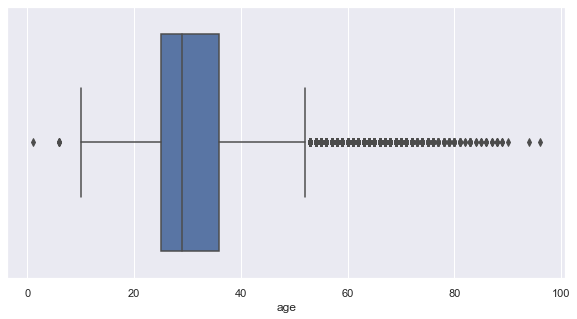

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='age',data=gender_age_train)

<AxesSubplot:xlabel='age', ylabel='gender'>

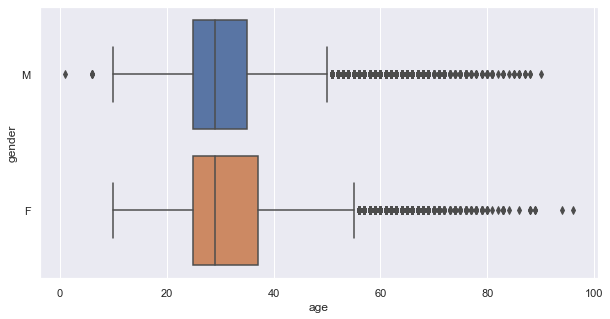

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(y='gender',x='age',data=gender_age_train)

In [ ]:
gender_age_train['age'].values

array([35, 35, 35, ..., 20, 37, 25], dtype=int64)

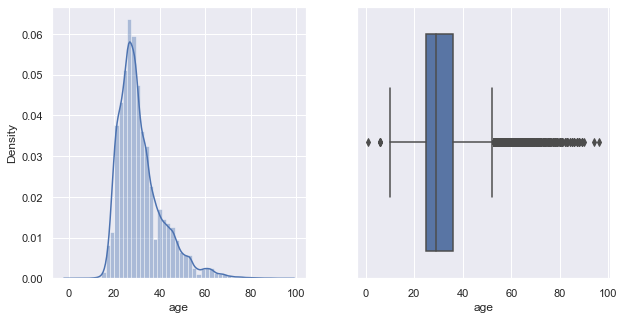

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(gender_age_train['age'])
plt.subplot(1,2,2)
sns.boxplot(gender_age_train['age'])
plt.show()

In [ ]:
percentile25 = gender_age_train['age'].quantile(0.25)
percentile75 = gender_age_train['age'].quantile(0.75)

In [ ]:
percentile75 - percentile25

11.0

In [ ]:
upper_limit = percentile75 + 1.5 * 11
lower_limit = percentile25 - 1.5 * 11

In [ ]:
upper_limit

52.5

In [ ]:
lower_limit

8.5

In [ ]:
gender_age_train[gender_age_train['age'] > upper_limit]
gender_age_train[gender_age_train['age'] < lower_limit]

,device_id,gender,age,group
10385,3553057874282315257,M,1,M22-
60779,8513863533705424532,M,6,M22-
60831,5323874218045578676,M,6,M22-
60832,3646841514566479686,M,6,M22-
60833,5222152119137955379,M,6,M22-


In [ ]:
new_outlier_df = gender_age_train[gender_age_train['age'] < upper_limit]
new_outlier_df.shape

(71490, 4)

In [ ]:
gender_age_train['age'].describe()

count    74645.000000
mean        31.410342
std          9.868735
min          1.000000
25%         25.000000
50%         29.000000
75%         36.000000
max         96.000000
Name: age, dtype: float64

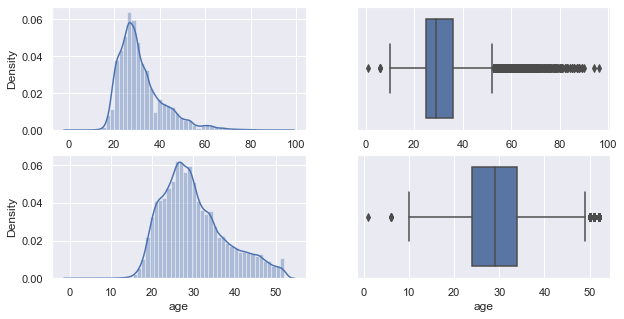

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(gender_age_train['age'])
plt.subplot(2,2,2)
sns.boxplot(gender_age_train['age'])
plt.subplot(2,2,3)
sns.distplot(new_outlier_df['age'])
plt.subplot(2,2,4)
sns.boxplot(new_outlier_df['age'])
plt.show()

In [ ]:
gender_age_train_final = gender_age_train.copy()
gender_age_train_final['age'] = np.where(
    gender_age_train_final['age'] > upper_limit,
    upper_limit,
    np.where(
        gender_age_train_final['age'] < lower_limit,
        lower_limit,
        gender_age_train_final['age']
    )
)

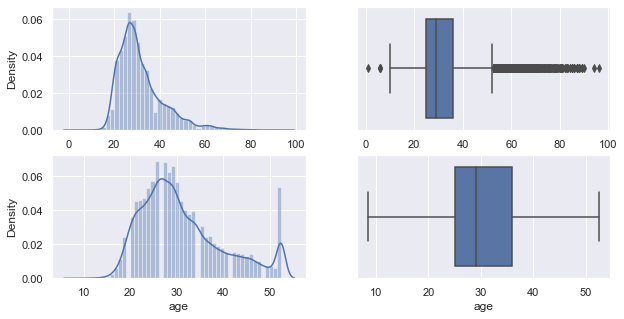

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(gender_age_train['age'])
plt.subplot(2,2,2)
sns.boxplot(gender_age_train['age'])
plt.subplot(2,2,3)
sns.distplot(gender_age_train_final['age'])
plt.subplot(2,2,4)
sns.boxplot(gender_age_train_final['age'])
plt.show()

In [ ]:
gender_age_train_final.head()

,device_id,gender,age,group
0,8076087639492063270,M,35.0,M32-38
1,2897161552818060146,M,35.0,M32-38
2,8260683887967679142,M,35.0,M32-38
3,4938849341048082022,M,30.0,M29-31
4,245133531816851882,M,30.0,M29-31


### Translating the Chinese language to English in Phone_Brand_Device_Model Data

In [ ]:
phone_brand_device_model['phone_brand'] = phone_brand_device_model['phone_brand'].replace(to_replace = ['vivo', '小米', 'OPPO',
        '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'],
        value= ['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei', 'Qiku', 'Meizu', 'Phixun',
       'China Mobile', 'HTC', 'Tianyu', 'Supreme treasure', 'LG', 'Oboxin', 'Youmi', 'ZUK', 'Nubia', 'HP',
       'Nibiru', 'Meitu', 'Xiangmi', 'Motorola', 'Mengmi', 'Hammer', 'InFocus', 'LeTV', 'Hisense', 'Bailifeng',
       'OnePlus', 'Yuxin', 'Haier', 'Cooby', 'Newman', 'Waveguide', 'Duowei', 'Ling Yun', 'TCL', 'Cooper', 'Aipel' ,
       'LOGO', 'Scallion', 'Guomi', 'Asus', 'Onda', 'Aiuni', 'Konka', 'Yougo', 'Banghua', 'Cyber Yuhua',
       'Black Rice', 'Lovme', 'Pioneer', 'E Pie', 'Shenzhou', 'Nokia', 'Pure', 'Candied Hulu', 'Yitong', 'Ouxin',
       'Mickey', 'Cool Doo Cube', 'Blue Devil', 'Little Poplar', 'Belfeng', 'Glutinous Rice', 'Mi Song', 'Eren Eben', 'Simi', 'Big Q' ,
       'Taipower', 'Philips', 'Weimi', 'Daxian', 'Changhong', 'Vitu', 'Qingcheng', 'Original', 'Shrimp', 'Xiaxin', 'Huang',
       'Baika', 'SUGAR', 'Okey', 'Century Star', 'Chi-Mag', 'Obi', 'Kivu', 'Femtosecond', 'Desai', 'Epai',
       'Google', 'Venus Digital', 'Guangxin', 'Noahs letter', 'MIL', 'White Rice', 'Big Cola', 'Baojixun', 'Youyu', 'Shouyun',
       'Rimi', 'Rigao', 'Wopfeng', 'Mole', 'Xianmi', 'Kellytong', 'Vip', 'Owo', 'Fengmi', 'Hengyufeng',
       'Ox', 'Siemens', 'Oraldi', 'PPTV'])

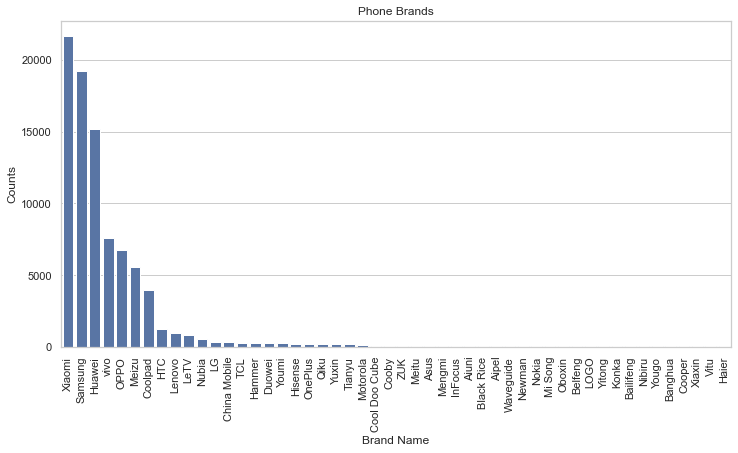

In [ ]:
#Phone Brand
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(x =phone_brand_device_model['phone_brand'].value_counts().keys()[:50], 
            y=phone_brand_device_model['phone_brand'].value_counts()[:50],
            color='b')
plt.xlabel('Brand Name')
plt.ylabel('Counts')
plt.title('Phone Brands')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
phone_brand_device_model['device_model'] = phone_brand_device_model['device_model'].replace(to_replace = ['红米Note2','红米Note3','大神F1Plus','note顶配版','星星1号','红米note', '青春版','荣耀4A','魅蓝Note 2',
                        '荣耀7i','荣耀畅玩4C','红米2A','荣耀畅玩5','荣耀7',  '红米1S','麦芒4','荣耀6','荣耀畅玩4X','荣耀3X畅玩版','荣耀X2',
                        '魅蓝NOTE','荣耀6 Plus','荣耀+','荣耀畅玩4','黄金斗士A8','小米note','荣耀3C','小米4C','红米note增强版','天鉴W900', '荣耀畅玩5X',
                        '红米2','大神F1','魅蓝2','Mate 7 青春版','乐檬K3 Note','火星一号','乐檬K3', '联想黄金斗士S8','大神F2','魅蓝','荣耀6 plus','大神F2全高清版',
                        '灵感XL','旗舰版','坚果手机','红米', '超级手机1 Pro','畅享5','魅蓝metal','超级手机1','超级手机1s','荣耀U8860','纽扣','荣耀畅玩平板T1', '红辣椒 X1',
                        '春雷HD','ivvi 小i','荣耀畅玩4C运动版','麦芒3','小鲜2','大器2', '锋尚','大神X7','小苹果','乐玩','大神Note3','么么哒3N','锋尚Pro','红辣椒','荣耀3X',
                        '三星big foot','荣耀3C畅玩版','ivvi 小骨Pro', '红辣椒XM', '远航3', 'My 布拉格', 'metal 标准版', '畅享5S', '红辣椒Note', '锋尚Max', '2016版 Galaxy', '红牛V5', 
                        '2016版 Galaxy', '锋尚2','金钢','野火S','2016版 Galaxy','红米3','小辣椒 X3','荣耀平板T1-','大神Note','7295A青春版','大Q Note','么么哒',
                        '小辣椒 M2','黄金斗士Note8','炫影S+','风华3','TALK 7X四核','2016版 Galaxy', '天鉴T1','土星一号', '麦芒3S','飞马','联想VIBE X2', '威武3', '红辣椒任性版',
                        '小辣椒 9', '大观4', '超级手机Max','星星2号','雷霆战机','威武3C', '倾城L3','Z9 mini 精英版','小辣椒S1', '小辣椒 5','T03锋至版','乐玩2C','么么哒3S','乐K31',
 '黄金斗士S8畅玩版','时尚手机'],
                            value= ['Redmi Note2', 'Redmi Note3', 'Great God F1Plus', 'note top version', 'Star 1', 'Redmi note',  'Youth Edition','Honor 4A','Meizu Note 2','Honor 7i','Honor Play 4C','Redmi 2A','Honor Play 5','Honor 7', 'Redmi 1S', 'Maimang 4', 'Honor 6', 'Honor Play 4X', 'Honor 3X Play Edition', 'Honor X2', 'Mei Lan NOTE', 'Honor 6 Plus',
                        'Honor+', 'Honor Play 4', 'Golden Fighter A8', 'Xiaomi Note', 'Honor 3C', 'Xiaomi 4C', 'Redmi Note Enhanced Edition', 'Tianjian W900',
                        'Honor Play 5X','Red Rice 2','Great God F1','Meizu 2','Mate 7 Youth Edition','Lemeng K3 Note','Mars One','Lemeng K3',
                        'Lenovo Gold Fighter S8', 'Dashen F2', 'Charm Blue', 'Honor 6 plus', 'Dashen F2 Full HD Version', 'Inspiration XL', 'Ultimate Edition', 'Nut Phone', 'Red Rice' ,
                        'Super Phone 1 Pro', 'Enjoy 5', 'Meizu Metal', 'Super Phone 1', 'Super Phone 1s', 'Honor U8860', 'Button', 'Honor Play Tablet T1', 'Red Pepper X1', 'Chunlei HD', 'ivvi Xiaoi', 'Honor Play 4C Sports Edition', 'Maimang 3', 'Xiaoxian 2','Big 2','Feng Shang','Great God X7','Little Apple','Have fun','Great God Note3','Momoda 3N','Fengshang Pro','Red chilli','Honor 3X','Samsung big foot','Honor 3C Play Edition','ivvi Osicles Pro', 'Red Pepper XM','voyage 3','My Prague','metal Standard Edition','Enjoy 5S','Red Pepper Note','Feng Shang Max','2016 Edition Galaxy','Red Bull V5','2016 Edition Galaxy','Feng Shang 2','Golden Steel','Wildfire S','2016 Edition Galaxy','Red Rice 3','Pepper X3','Honor Tablet T1-','Great God Note','7295A Youth Edition','Big Q Note','mwah','Pepper M2','Golden Warrior Note8', 'Hyunying S+','Fenghua 3','TALK 7X Quad Core','2016 version of Galaxy','Tianjian T1','Saturn One','Maimang 3S','Pegasus','Lenovo VIBE X2','Mighty 3','Red pepper capricious version','Pepper 9','Grand View 4','Super Phone Max','Star 2','Thunder Fighter','Mighty 3C','Allure L3','Z9 mini Elite Edition','Chili S1','Pepper 5','T03 Frontier Edition','Fun 2C','Momada 3S','Lemeng K31','Golden Fighter S8 Play Edition','Fashionable phone'])


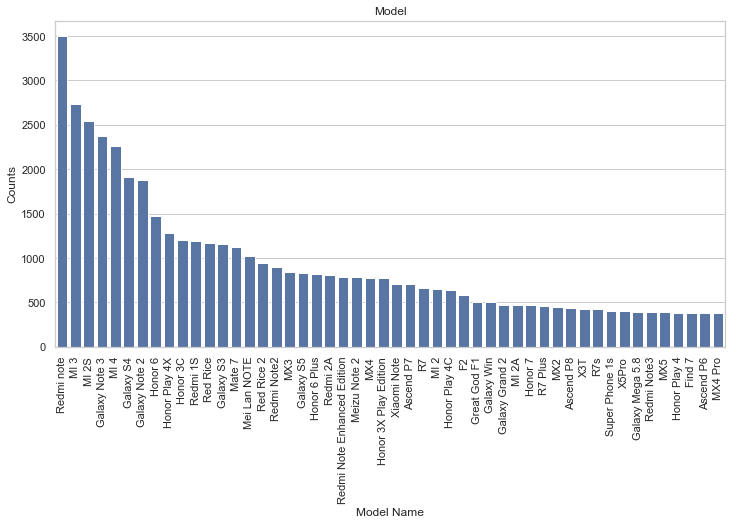

In [ ]:
# Device Model
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(x =phone_brand_device_model['device_model'].value_counts().keys()[:50], 
            y=phone_brand_device_model['device_model'].value_counts()[:50],
            color = 'b')
plt.xlabel('Model Name')
plt.ylabel('Counts')
plt.title('Model')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
phone_brand_device_model.head(20)

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,3766087376657242966,Xiaomi,V183
2,6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,2015528097870762664,Xiaomi,Redmi Note2
5,8896952452425303597,Xiaomi,Redmi Note3
6,2634171391322875113,Xiaomi,S5.1
7,2526386806972133373,Samsung,Galaxy Grand Prime
8,1427934937997164515,Xiaomi,MI 2S
9,2866484947180243791,Samsung,Galaxy Note 2


## Merging all 3 data set

In [ ]:
df1 = pd.merge(events_data_final, gender_age_train_final, how='inner', left_index=True, right_index=True)
df1

,event_id,timestamp,city,state,device_id_x,longitude,latitude,device_id_y,gender,age,group
0,2765368,2016-05-07 22:52:05,Delhi,Delhi,2.973348e+18,77.225676,28.730140,8076087639492063270,M,35.0,M32-38
1,2955066,2016-05-01 20:44:16,Calcutta,WestBengal,4.734221e+18,88.388361,22.660325,2897161552818060146,M,35.0,M32-38
2,605968,2016-05-02 14:23:04,Delhi,Delhi,3.264500e+18,77.256809,28.757906,8260683887967679142,M,35.0,M32-38
3,448114,2016-05-03 13:21:16,Chennai,TamilNadu,5.731369e+18,80.343613,13.153332,4938849341048082022,M,30.0,M29-31
4,665740,2016-05-06 03:51:05,Bokaro,Jharkhand,3.388880e+17,85.997745,23.842609,245133531816851882,M,30.0,M29-31
...,...,...,...,...,...,...,...,...,...,...,...
74640,3045675,2016-05-03 02:56:21,Chennai,TamilNadu,4.664676e+18,80.341769,13.139620,4682031842235089751,M,30.0,M29-31
74641,476332,2016-05-02 00:06:01,Calcutta,WestBengal,2.314609e+18,88.448258,22.660800,9178703742877135986,M,30.0,M29-31
74642,3203647,2016-05-01 15:12:22,Visakhapatnam,AndhraPradesh,4.402192e+18,83.345934,17.750780,180946546684162312,M,20.0,M22-
74643,2636025,2016-05-05 05:36:25,Delhi,Delhi,7.102819e+18,77.254886,28.750318,1390702386071991851,M,37.0,M32-38


In [ ]:
df1.isnull().sum()

event_id       0
timestamp      0
city           0
state          0
device_id_x    0
longitude      0
latitude       0
device_id_y    0
gender         0
age            0
group          0
dtype: int64

In [ ]:
df2 = pd.merge(df1, phone_brand_device_model, how='inner',left_index=True, right_index=True)
df2

,event_id,timestamp,city,state,device_id_x,longitude,latitude,device_id_y,gender,age,group,device_id,phone_brand,device_model
0,2765368,2016-05-07 22:52:05,Delhi,Delhi,2.973348e+18,77.225676,28.730140,8076087639492063270,M,35.0,M32-38,1877775838486905855,vivo,Y13
1,2955066,2016-05-01 20:44:16,Calcutta,WestBengal,4.734221e+18,88.388361,22.660325,2897161552818060146,M,35.0,M32-38,3766087376657242966,Xiaomi,V183
2,605968,2016-05-02 14:23:04,Delhi,Delhi,3.264500e+18,77.256809,28.757906,8260683887967679142,M,35.0,M32-38,6238937574958215831,OPPO,R7s
3,448114,2016-05-03 13:21:16,Chennai,TamilNadu,5.731369e+18,80.343613,13.153332,4938849341048082022,M,30.0,M29-31,8973197758510677470,Samsung,A368t
4,665740,2016-05-06 03:51:05,Bokaro,Jharkhand,3.388880e+17,85.997745,23.842609,245133531816851882,M,30.0,M29-31,2015528097870762664,Xiaomi,Redmi Note2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74640,3045675,2016-05-03 02:56:21,Chennai,TamilNadu,4.664676e+18,80.341769,13.139620,4682031842235089751,M,30.0,M29-31,645809688714362797,Samsung,Galaxy S4
74641,476332,2016-05-02 00:06:01,Calcutta,WestBengal,2.314609e+18,88.448258,22.660800,9178703742877135986,M,30.0,M29-31,7956671058178230396,Huawei,Honor Play 4
74642,3203647,2016-05-01 15:12:22,Visakhapatnam,AndhraPradesh,4.402192e+18,83.345934,17.750780,180946546684162312,M,20.0,M22-,1645464957507712077,vivo,X5Max+
74643,2636025,2016-05-05 05:36:25,Delhi,Delhi,7.102819e+18,77.254886,28.750318,1390702386071991851,M,37.0,M32-38,2115972819171044884,Samsung,Galaxy S6 Edge


In [ ]:
df2.isnull().sum()

event_id        0
timestamp       0
city            0
state           0
device_id_x     0
longitude       0
latitude        0
device_id_y     0
gender          0
age             0
group           0
device_id       0
phone_brand     0
device_model    0
dtype: int64

In [ ]:
df2.columns

Index(['event_id', 'timestamp', 'city', 'state', 'device_id_x', 'longitude',
       'latitude', 'device_id_y', 'gender', 'age', 'group', 'device_id',
       'phone_brand', 'device_model'],
      dtype='object')

In [ ]:
cols_to_keep = ['event_id', 'device_id','timestamp', 'city', 'state', 'longitude',
       'latitude', 'gender', 'age', 'group','phone_brand', 'device_model']
df_final_data = df2[cols_to_keep]
df_final_data

,event_id,device_id,timestamp,city,state,longitude,latitude,gender,age,group,phone_brand,device_model
0,2765368,1877775838486905855,2016-05-07 22:52:05,Delhi,Delhi,77.225676,28.730140,M,35.0,M32-38,vivo,Y13
1,2955066,3766087376657242966,2016-05-01 20:44:16,Calcutta,WestBengal,88.388361,22.660325,M,35.0,M32-38,Xiaomi,V183
2,605968,6238937574958215831,2016-05-02 14:23:04,Delhi,Delhi,77.256809,28.757906,M,35.0,M32-38,OPPO,R7s
3,448114,8973197758510677470,2016-05-03 13:21:16,Chennai,TamilNadu,80.343613,13.153332,M,30.0,M29-31,Samsung,A368t
4,665740,2015528097870762664,2016-05-06 03:51:05,Bokaro,Jharkhand,85.997745,23.842609,M,30.0,M29-31,Xiaomi,Redmi Note2
...,...,...,...,...,...,...,...,...,...,...,...,...
74640,3045675,645809688714362797,2016-05-03 02:56:21,Chennai,TamilNadu,80.341769,13.139620,M,30.0,M29-31,Samsung,Galaxy S4
74641,476332,7956671058178230396,2016-05-02 00:06:01,Calcutta,WestBengal,88.448258,22.660800,M,30.0,M29-31,Huawei,Honor Play 4
74642,3203647,1645464957507712077,2016-05-01 15:12:22,Visakhapatnam,AndhraPradesh,83.345934,17.750780,M,20.0,M22-,vivo,X5Max+
74643,2636025,2115972819171044884,2016-05-05 05:36:25,Delhi,Delhi,77.254886,28.750318,M,37.0,M32-38,Samsung,Galaxy S6 Edge


In [ ]:
df_final_data['device_id'].nunique()

74645

<a name = Section7></a>
# **7. Data Post-Profiling**

In [ ]:
#post_profile_Event = ProfileReport(events_data_final)
#post_profile_Event.to_file(output_file='Post Profiling Report_Event.html')
#post_profile_Event
#print('Accomplished!')

In [ ]:
#post_profile_Age_Gender = ProfileReport(gender_age_train_final)
#post_profile_Age_Gender.to_file(output_file='Post Profiling Report_Age_Gender.html')
#post_profile_Age_Gender
#print('Accomplished!')

In [ ]:
#post_profile_Phone_Brand = ProfileReport(phone_brand_device_model)
#post_profile_Phone_Brand.to_file(output_file='Post Profiling profile_Phone_Brand.html')
#post_profile_Phone_Brand
#print('Accomplished!')

<a name = Section8></a>
# **8. Exploratory Data Analysis**

**Do an Analysis of the preprocessed data.**


Here are the points about how Analysis should be done:


1. Distribution of Users(device_id) across States.


2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).


3. Distribution of Users across Gender.


4. Distribution of Users across Age Segments.


5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.


6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).


7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).



Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.


8. Hourly distribution of Phone Calls.


9. Plot the Users on the Map using any suitable package.

## 1. Distribution of Users(device_id) across States.

In [ ]:
plt.figure(figsize = (15,10))
plt.title("Distribution of users across state", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 20, fontfamily = 'Arial')
plt.ylabel("", size = 15, fontfamily = 'Arial')
plt.yticks(ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(order = df_final_data['state'].value_counts().index,data = df_final_data,
              y="state", palette = "mako")

NameError: ignored

In [ ]:
df_final_data['state'].value_counts()[0:]

**We observerd that, Delhi has the maximum number of users with the count of 17078 followed by Maharashtra with 15509 and TamilNadu with 10137.**

## 2.  Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [ ]:
plt.figure(figsize = (15,5))
plt.title("10 Most Used Phone Brand", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.ylabel("User", size = 15, fontfamily = 'Arial')
plt.yticks(ha = 'right', size = 12, fontfamily = 'Arial')
sns.barplot(x=df_final_data['phone_brand'].value_counts()[:10].index, y= df_final_data['phone_brand'].value_counts()[:10])

In [ ]:
plt.figure(figsize = (15,5))
plt.title("10 Most Used Device Model", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.ylabel("User", size = 15, fontfamily = 'Arial')
plt.yticks(ha = 'right', size = 12, fontfamily = 'Arial')
sns.barplot(x=df_final_data['device_model'].value_counts()[:10].index, y= df_final_data['device_model'].value_counts()[:10])

In [ ]:
df_final_data['phone_brand'].value_counts()[0:10]

**The top 10 most used brands are Xiaomi with 18357 users, Samsung with 16424, Huawei with 12990, vivo with 6475, OPPO with 5650, Meizu with 4686, Coolpad with 3359, HTC with 1089, Lenovo with 849, LeTV wtih 698 users.**

## 3. Distribution of users across gender

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Distribution of users across gender ", size = 20, fontfamily = 'Arial')
sns.countplot(df_final_data['gender'],
                      data = df_final_data, palette = "dark")

In [ ]:
df_final_data['gender'].value_counts()

In [ ]:
plt.figure(figsize=(10, 7))
plt.pie(x = df_final_data['gender'].value_counts(), autopct = '%.1f%%', 
             labels = df_final_data['gender'].value_counts().index)

In [ ]:
df_final_data['age'].min()

In [ ]:
df_final_data['age'].max()

**We observered that male users are more as compared to female in the data set. Mare user are accounted 64% whereas 36% users are female.**

## 4. Distribution of Users across Age Segments

In [ ]:
fig = plt.figure(figsize=(15, 8))
plt.title("Distribution of Users across age segments", size = 20, fontfamily = 'Arial')
sns.countplot(x = df_final_data['group'],
                      data = df_final_data, palette = "deep")

In [ ]:
df_final_data.groupby(['age'])['device_id'].count().sort_values(ascending=False).plot.bar(figsize=(16,6))

In [ ]:
# Age distribution for each gender
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
df_plot = df_final_data.drop_duplicates(subset = ["device_id"]).sort_values(by='device_id')

plt.title("Age distribution for each gender", size = 20, fontfamily = 'Arial')
Male_user = df_final_data[df_final_data['gender'] == 'M'].copy()
Male_user = Male_user['age']
Female_user = df_final_data[df_final_data['gender'] == 'F'].copy()
Female_user = Female_user['age']

plt.hist(Male_user, label='Male_user')
plt.hist(Female_user, label='Female_user')
plt.legend()

In [ ]:
import numpy as np

###pie chart for group

df_final_data['group'].value_counts()
group_count=df_final_data['group'].value_counts().reset_index().sort_values(by='index')
group_count.columns=['group','Count']

g_count=df_final_data['gender'].value_counts().reset_index().sort_values(by='index')
g_count.columns=['gender','Count']


# Create a trace
tag = (np.array(group_count.group))
sizes = (np.array((group_count['Count'] / group_count['Count'].sum())))
g_sizes = (np.array((g_count['Count'] / g_count['Count'].sum())))
g_tag = (np.array(g_count.gender))

grp_labels = zip(tag, sizes)
g_labels = zip(g_tag, g_sizes)


fig, ax = plt.subplots(figsize=(15,9))

size = 0.3
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 3,4,5, 6,7,8, 9, 10,11,12]))


ax.pie(g_sizes, radius=1, colors=outer_colors,autopct='%.2f%%',#labels=g_tag,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(sizes, radius=1-size, colors=inner_colors,#autopct='%3.1f%%',#labels=tag,
       wedgeprops=dict(width=size, edgecolor='w'))


ax.set(aspect="equal", title='Pie plot with `ax.pie`')
plt.title("Distribution of usage across Age Groups", size = 20, fontfamily = 'Arial')
#plt.legend(loc='right', prop=font_prop, numpoints=1)

plt.legend(
    loc='upper left',
    prop={'size': 12},
    labels=['%s, %1.1f%%' % (
        l, (float(s)) * 100) for l, s in grp_labels],
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig.transFigure
)


#plt.legend(loc='center', prop=font_prop, numpoints=1)
plt.show()

**We observed that the users whose age segment falls under 23-26, 32-38 are maximum.
Age of maximum users (Male & Female) are around 20 to 40. Almost 50% of the users are of age between 22 to 32.**

**There are 12 distinct age groups defined in the dataset (seperating male & female). All male age group user counts are higher than the female age group user counts. Even though maximum users are between 22 to 32, age group M32-38, M39+ dominates in the graph due to bigger age band as compared to M23-26, M27-28, M29-31.**

## 5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

**Distribution of 10 most used phone brand across Age Segment**

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("group", hue="phone_brand", hue_order=df_final_data.phone_brand.value_counts().iloc[:10].index, order=df_final_data.group.value_counts().iloc[:].index, data=df_final_data)
plt.title("Distribution of 10 most used phone brand across Age Segment", size = 20, fontfamily = 'Arial')
plt.show()

**Distribution of 10 most used phone brand across State**

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("state", hue="phone_brand", hue_order=df_final_data.phone_brand.value_counts().iloc[:10].index, order=df_final_data.state.value_counts().iloc[:10].index, data=df_final_data)
plt.title("Distribution of 10 most used phone brand across State", size = 20, fontfamily = 'Arial')
plt.show()

**Distribution of 10 most used phone brand across Gender**

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("gender", hue="phone_brand", hue_order=df_final_data.phone_brand.value_counts().iloc[:10].index, order=df_final_data.gender.value_counts().iloc[:].index, data=df_final_data)
plt.title("Distribution of 10 most used phone brand across Gender", size = 20, fontfamily = 'Arial')
plt.show()

**A) - Usage of phone brand for Male users with Age segment 23-26 are more against other age segments.                                                                                                                                                                                                
B) - Usage of phone brand are Higher in Delhi followed by Maharashtra and TamilNadu.                                                                                                                                                                                                
c) - Usage of phone brand are higher in Male users as compared to female users.**      

## 6-Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands)?

**Distribution of Gender across State**

In [ ]:
plt.figure(figsize = (15,5))
plt.title("Distribution of Gender across State", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.ylabel("User", size = 15, fontfamily = 'Arial')
plt.yticks(ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(order = df_final_data['state'].value_counts()[0:10].index, data = df_final_data,
              x="state", palette = "mako", hue = 'gender')

**Distribution of Gender across Age Segment**

In [ ]:
plt.figure(figsize = (15,5))
plt.title("Distribution of Gender across Age Segment", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.ylabel("User", size = 15, fontfamily = 'Arial')
plt.yticks(ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(order = df_final_data['group'].value_counts().index, data = df_final_data,
              x="group", palette = "mako", hue = 'gender')

**Distribution of Gender across Phone Brand**

In [ ]:
plt.figure(figsize = (15,5))
plt.title("Distribution of Gender across Phone Brand", size = 20, fontfamily = 'Arial')
plt.xlabel("", size = 15, fontfamily = 'Arial')
plt.ylabel("User", size = 15, fontfamily = 'Arial')
plt.yticks(ha = 'right', size = 12, fontfamily = 'Arial')
sns.countplot(order = df_final_data['phone_brand'].value_counts()[:10].index, data = df_final_data,
              x="phone_brand", palette = "mako", hue = 'gender')

**A) - Male users are more than Female in across all the states.                                                                                                                                                                                               
B) - Male users with Age group 23-26 and 32-38 records for the maximum counts. In Female Age group 33-42 records the maximum counts.                                                                                                                                                                                               
C) - Xiaomi is the most favourite brand across gender followed by Samsung and Huawei.**

## 7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).

**Distribution of Age Segment across State**

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("state", hue="group", hue_order=df_final_data.group.value_counts().iloc[:10].index, order=df_final_data.state.value_counts().iloc[:5].index, data=df_final_data)
plt.title("Distribution of Age Segment across State (Only top 5 State considered)",  size = 20, fontfamily = 'Arial')
plt.show()

**Distribution of Age Segment across Gender**

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("gender", hue="group", hue_order=df_final_data.group.value_counts().iloc[:10].index, order=df_final_data.gender.value_counts().iloc[:5].index, data=df_final_data)
plt.title("Distribution of Age Segment across Gender", size = 20, fontfamily = 'Arial')
plt.show()

**Distribution of Age Segment across Phone Brand**

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("phone_brand", hue="group", hue_order=df_final_data.group.value_counts().iloc[:10].index, order=df_final_data.phone_brand.value_counts().iloc[:10].index, data=df_final_data)
plt.title("Distribution of Age Segment across Phone Brand (Top 10 Brands considered)", size = 20, fontfamily = 'Arial')
plt.show()

**A) - MIn Delhi the Male users are with Age group 23-26 are more wheras in Maharashtra Male user with Age group 32-38 are more.                                                                                                                                                                                             
B) - Male users with Age group 23-26 records for the maximum counts. In Female Age group 33-42 records the maximum counts.                                                                                                                                                                                               
C) - Xiaomi is the most favourite brand for age group of Male 23-32. Vivo is the most favourite brand of Male age group 32-38. HTC is most used by the Male user with age is 39+.** 

## 8. Hourly distribution of Phone Calls.

In [ ]:
import datetime

In [ ]:
df_final_data['date'] = pd.to_datetime(df_final_data['timestamp']).dt.date
df_final_data['time'] = pd.to_datetime(df_final_data['timestamp']).dt.time
df_final_data['hour'] = pd.to_datetime(df_final_data['timestamp']).dt.hour

In [ ]:
df_final_data.head()

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('hour', hue = 'gender', hue_order = df_final_data.gender.value_counts().iloc[:10].index, data = df_final_data)
plt.title("Hourly Distribution of phone call for gender",size = 20, fontfamily = 'Arial')

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot("hour", hue="city", hue_order=df_final_data.city.value_counts().iloc[:2].index, data=df_final_data)
plt.title("Hourly call distribution for top 2 cities", size = 20, fontfamily = 'Arial')

**We observed that at 10 am users are more active making a phone calls. Also, we observed at 20th, 21st and 22nd hours users are active making a calls.Male users are making more calls.**

## 9. Plot the Users on the Map using any suitable package.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
x = df_final_data['longitude']
y = df_final_data['latitude']
output_notebook()
p = figure()
p.circle(x,y)
show(p)

**We observed that the users are more active in Delhi followed by Maharashtra and TamilNadu.**

## Showing Age Distribution using a Box plot

In [ ]:
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="city", order=df_final_data.city.value_counts().iloc[:5].index, data=df_final_data, palette="Set3")
plt.title("Box Plot for Age Distribution across top 5 Cities", size = 20, fontfamily = 'Arial')

In [ ]:
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="phone_brand", order=df_final_data.phone_brand.value_counts().iloc[:10].index, data=df_final_data, palette="Set3")
plt.title("Box plot for Age Distribution across top 10 Brands", size = 20, fontfamily = 'Arial')
# sns.despine()

In [ ]:
#Median age of users across top 10 phone brands are almost same.
# Box plot for age
plt.figure(figsize=(15,5))
sns.set(style="whitegrid")
sns.boxplot(y="age", x="gender", data=df_final_data, palette="Set3")
plt.title("Box plot for Age Distribution across Gender", size = 20, fontfamily = 'Arial')

In [ ]:
df_final_data1 = df_final_data[['event_id', 'device_id', 'timestamp', 'longitude', 'latitude', 'state']]

In [ ]:
df_final_data1.to_csv('myevents.csv', index = False)

<a name = Section9></a>
# **9. Summarization**

### **Observation** 

From the given data set the below observasion can be drawn:

1. Delhi has the maximum number of users with the count of 17078 followed by Maharashtra with 15509 and TamilNadu with 10137.

2. The top 10 most used brands are Xiaomi with 18357 users, Samsung with 16424, Huawei with 12990, vivo with 6475, OPPO with 5650, Meizu with 4686, Coolpad with 3359, HTC with 1089, Lenovo with 849, LeTV wtih 698 users.

3. Xiaomi is the most used phone brands across users.

4. Male users are more as compared to female in the data set. Male user are accounted 64% whereas 36% users are female.

5. The users whose age segment falls under 23-26, 32-38 are maximum. The usage of phone is more for the users age between 23 - 38.

6. Usage of phone brand for Male users with Age segment 23-26 are more against other age segments.

7. Usage of phone brand are Higher in Delhi followed by Maharashtra and TamilNadu.

8. Usage of phone brand are higher in Male users as compared to female users.

9. Male users are more than Female in across all the states. 

10. Male users with Age group 23-26 and 32-38 records for the maximum counts. In Female Age group 33-42 records the maximum counts.

11. Xiaomi is the most favourite brand across gender followed by Samsung and Huawei.

12. Min Delhi the Male users are with Age group 23-26 are more wheras in Maharashtra Male user with Age group 32-38 are more.   

13. Male users with Age group 23-26 records for the maximum counts. In Female Age group 33-42 records the maximum counts.   

14. Xiaomi is the most favourite brand for age group of Male 23-32. Vivo is the most favourite brand of Male age group 32-38. HTC is most used by the Male user with age is 39+.

15. We observed that at 10 am users are more active making a phone calls. Also, we observed at 20th, 21st and 22nd hours users are active making a calls.Male users are making more calls.

17. The users are more active in Delhi followed by Maharashtra and TamilNadu.

Conclusion

# THANK YOU